# Week 1 Exercises

## Imports

In [41]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.abspath(''), '..', '..'))
from toolbox import kernel
import imp
imp.reload(kernel)

<module 'toolbox.kernel' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week1/../../toolbox/kernel.py'>

## Global Variables

## Exercise 1.1.1

Exercise data

In [42]:
fibres_xcth_img = cv2.imread(os.path.join('data', 'fibres_xcth.png'))

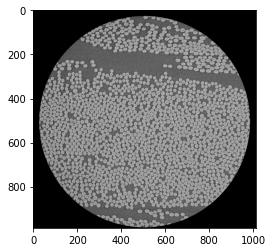

In [43]:
plt.imshow(fibres_xcth_img)

### Task 1

Experimentally verify the separability of the Gaussian convolution
kernel. <br>
Do this by convolving a test image with a 2D kernel, and
convolving the same image with two orthogonal 1D kernels. 
<br>
Subtract the result and verify that the difference is very small.

In [45]:
sigma = 5
g = kernel.gaussian_1d(sigma, size=sigma)
dg = kernel.dgaussian_1d(sigma, size=sigma)

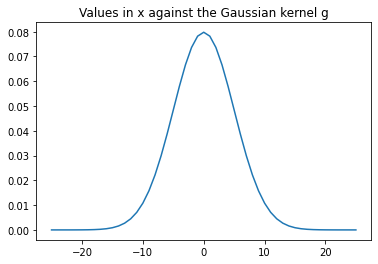

In [50]:
plt.title('Values in x against the Gaussian kernel g')
size = 5
s = np.ceil(np.max([sigma*size, size]))
x = np.arange(-s,s+1)
plt.plot(x, g)
plt.show()

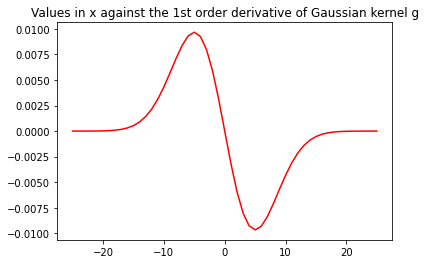

In [51]:
plt.title('Values in x against the 1st order derivative of Gaussian kernel g')
test_dg = kernel.dgaussian_1d(sigma, size=size)
plt.plot(x, test_dg, c='red')
plt.show()

In [52]:
convolve_1D_img = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img, g), g.T)

g_2d = np.outer(g, g)
convolve_2D_img = kernel.convolve_img(fibres_xcth_img, g_2d)

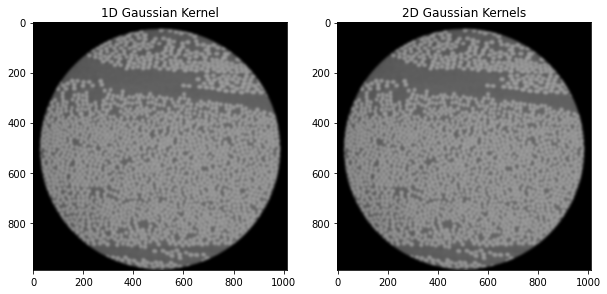

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(convolve_1D_img)
ax[0].set_title('1D Gaussian Kernel')
ax[1].imshow(convolve_2D_img)
ax[1].set_title('2D Gaussian Kernels')
plt.show()

Mean diff: 0.3722917857328415


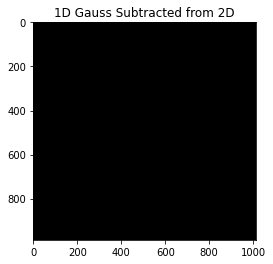

In [54]:
diff = convolve_2D_img-convolve_1D_img
print(f'Mean diff: {np.mean(diff)}')
plt.imshow(diff)
plt.title('1D Gauss Subtracted from 2D')
plt.show()

### Task 2

Investigate the difference between the derivative of the image convolved by a Gaussian 
<br>
and the image convolved with the derivative of the Gaussian as described in Eq. 1.7. 
<br>
Note that you can compute the derivative of the image by convolving with the kernel k = [0.5, 0, -0.5]

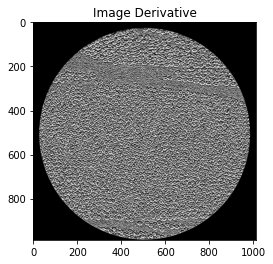

In [102]:
sigma = 0.2 # We need a quite low standard deviation
g = kernel.gaussian_1d(sigma)
dg = kernel.dgaussian_1d(sigma)

k = np.asarray([0.5, 0, -0.5])
k = k.reshape(k.shape + (1,))
img_deriv = kernel.convolve_img(fibres_xcth_img, k)
plt.imshow(img_deriv)
plt.title('Image Derivative')
plt.show()

### Derivative of image convolved with a Gaussian

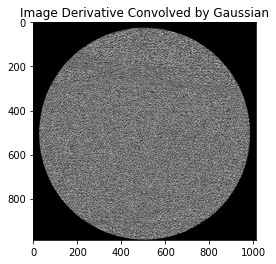

In [128]:
convolved_img_deriv = kernel.convolve_img(kernel.convolve_img(img_deriv, g), g.T)
plt.imshow(convolved_img_deriv)
plt.title('Image Derivative Convolved by Gaussian')
plt.show()

### Gaussian Derivative Convolved by Image

In [133]:
conv = kernel.convolve_img
convolved_img_dg = conv(conv(fibres_xcth_img, dg), g.T)

Mean diff: 83.87982043155577


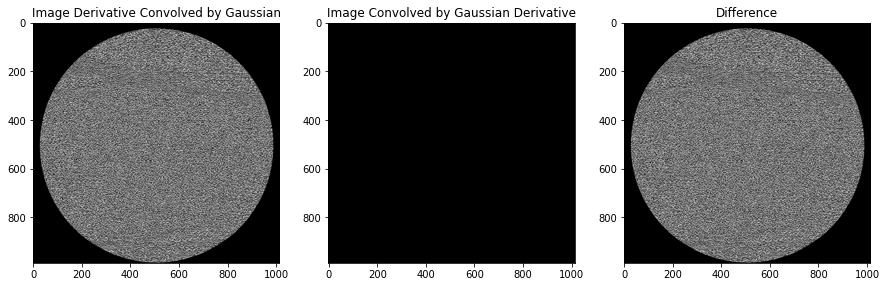

In [135]:
img_dg_diff = convolved_img_deriv-convolved_img_dg
print(f'Mean diff: {np.mean(img_dg_diff)}')

fig, ax = plt.subplots(1, 3, figsize=(15,10))

ax[0].imshow(convolved_img_deriv)
ax[0].set_title('Image Derivative Convolved by Gaussian')
ax[1].imshow(convolved_img_dg)
ax[1].set_title('Image Convolved by Gaussian Derivative')
ax[2].imshow(convolved_img_deriv-convolved_img_dg)
ax[2].set_title('Difference')
plt.show()

## Task 3

In [70]:
size = 5
large_sigma = np.sqrt(20)
small_sigma = np.sqrt(2)
large_g = kernel.gaussian_1d(large_sigma, size=size)
small_g = kernel.gaussian_1d(small_sigma, size=size)

In [78]:
large_conv_img = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img,large_g),large_g.T)

small_conv_img = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img, small_g), small_g.T)
for i in range(1,10):
    small_conv_img = kernel.convolve_img(kernel.convolve_img(small_conv_img, small_g), small_g.T)

Mean diff: 6.67310390030814


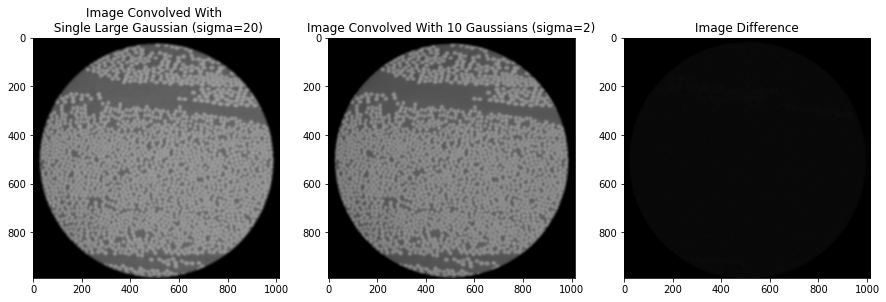

In [79]:
small_large_diff = large_conv_img-small_conv_img
print(f'Mean diff: {np.mean(small_large_diff)}')

fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].imshow(large_conv_img)
ax[0].set_title('Image Convolved With \n Single Large Gaussian (sigma=20)')
ax[1].imshow(small_conv_img)
ax[1].set_title('Image Convolved With 10 Gaussians (sigma=2)')
ax[2].imshow(small_large_diff)
ax[2].set_title('Image Difference')
plt.show()

## Task 4

In [120]:
sigma_10 = np.sqrt(10)
sigma_20 = np.sqrt(20)

g20 = kernel.gaussian_1d(sigma_20)
dg20 = kernel.dgaussian_1d(sigma_20)
g10 = kernel.gaussian_1d(sigma_10)
dg10 = kernel.dgaussian_1d(sigma_10)

In [123]:
img_dg20 = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img, dg20), g20.T)
img_g10 = kernel.convolve_img(kernel.convolve_img(fibres_xcth_img, g10), g10.T)
img_dg10 = kernel.convolve_img(kernel.convolve_img(img_g10, dg10), g10.T)

Mean diff: 65.83274516308236


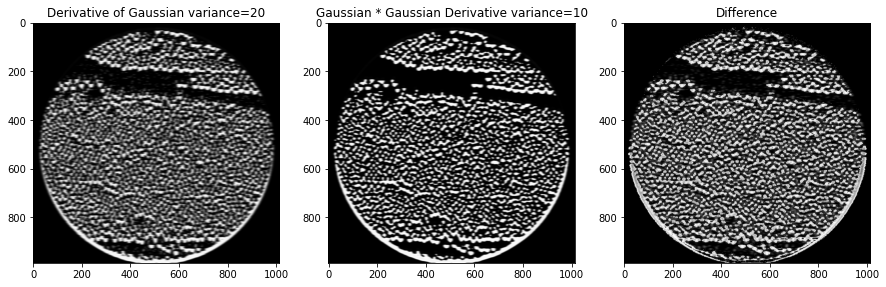

In [124]:
dg20_dg10_diff = img_dg20-img_dg10
print(f'Mean diff: {np.mean(dg20_dg10_diff)}')

fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].imshow(img_dg20)
ax[0].set_title('Derivative of Gaussian variance=20')
ax[1].imshow(img_dg10)
ax[1].set_title('Gaussian * Gaussian Derivative variance=10')
ax[2].imshow(dg20_dg10_diff)
ax[2].set_title('Difference')
plt.show()